<center><h1> Political party program LDA </h1></center>

# 1. Information

# 2. Fetching Data

## 2.1 Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tika import parser
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

import pickle
from tqdm import tqdm_notebook

In [2]:
prepare = True

## 2.2 Text Preprocess

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import punctuation
import pymorphy2

In [8]:
#Preprocess function
def preprocess_text(text):
    tokenizer = RegexpTokenizer('\w+|[^\w\s]+«»')
    morph = pymorphy2.MorphAnalyzer()
    stop_words = stopwords.words('russian')
    data_tokenized=tokenizer.tokenize(text)
    tokens = [morph.parse(token)[0].normal_form for token in data_tokenized]
    tokens = [token for token in tokens if token not in stop_words\
              and token != " " \
              and token.strip() not in punctuation]
    #text = " ".join(tokens)
    
    return tokens

In [9]:
def parce_prog(data, prog_file, party_name, ideology):
    cnt=0
    #data = pd.DataFrame(columns = ['text', 'party'])
    print('\r'+party_name)
    while True:
        try:
            name = 'party/text/' + prog_file + '_' + str(cnt)+'.txt'
            string = parser.from_file(name)['content']
            data_lemmed = preprocess_text(string)
            data = data.append({'text': str(data_lemmed), 'party': party_name, 'ideology':ideology},ignore_index=True)
            cnt +=1
        except:
            break
    return data

In [10]:
df = pd.DataFrame(columns = ['text', 'party', 'ideology'])
party_name = ['Единая Россия', 'ЛПР', 'Справедливая Россия', 'КПРФ', 'ЛДПР', 'Навальный', 
                                 'Партия Роста', 'РотФронт', 'Союз Марксистов', 'Яблоко',
                                 'Патриоты России', 'Гражданская Платформа']
prog_file = ['edro', 'lpr', 'spr', 'kprf', 'ldpr', 'navalny', 'partia_rosta', 'rotfront', 'sous_marksistov', 'yabloko', 'patriot_rus', 'grajd_plat']
ideology = ['центризм консерватизм', 'либертарианство', 'левый центризм', 'левый центризм', 'либеральный консерватизм', 'либеральный консерватизм',
           'либеральный консерватизм', 'марксизм-ленинизм', 'марксизм-ленинизм', 'социальный либерализм',
            'демократический социализм', 'консерватизм либерализм']
#prog_file=['ldpr']
#party_name = ['ЛДПР']
for i in tqdm_notebook(range(len(prog_file))):
    df = parce_prog(df, prog_file[i], party_name[i], ideology[i])

Единая Россия


2020-07-26 17:20:30,547 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


ЛПР
Справедливая Россия
КПРФ
ЛДПР
Навальный
Партия Роста
РотФронт
Союз Марксистов
Яблоко
Патриоты России
Гражданская Платформа



In [11]:
df.party.value_counts()

ЛДПР                     101
Справедливая Россия       21
Партия Роста              13
Патриоты России           13
Гражданская Платформа     12
Яблоко                    10
Навальный                  9
Единая Россия              9
Союз Марксистов            9
ЛПР                        6
КПРФ                       5
РотФронт                   5
Name: party, dtype: int64

In [12]:
df.shape

(213, 3)

In [13]:
df.head(13)

text          party  \
0   ['уважаемый', 'гражданин', 'россия', 'партия',...  Единая Россия   
1   ['качество', 'государство', 'эффективность', '...  Единая Россия   
2   ['экономика', 'рост', 'благосостояние', 'содер...  Единая Россия   
3   ['социальный', 'политика', 'вложение', 'каждый...  Единая Россия   
4   ['умный', 'сила', 'культурный', 'лидерство', '...  Единая Россия   
5   ['здоровый', 'будущее', 'здоровый', 'человек',...  Единая Россия   
6   ['хозяин', 'собственный', 'дом', 'партия', 'ед...  Единая Россия   
7   ['аграрный', 'сверхдержава', 'партия', 'единый...  Единая Россия   
8   ['справедливость', 'безопасность', 'мир', 'рос...  Единая Россия   
9   ['наш', 'программа', 'предлагать', 'конкретный...            ЛПР   
10  ['ii', 'судебный', 'правоохранительный', 'рефо...            ЛПР   
11  ['iii', 'социальный', 'реформа', 'ниже', 'пред...            ЛПР   
12  ['iv', 'экономический', 'реформа', 'природопол...            ЛПР   

                 ideology  
0   центризм консерватизм  
1   центризм консерватизм  
2   центризм консерватизм  
3   центризм консерватизм  
4   центризм консерватизм  
5   центризм консерватизм  
6   центризм консерватизм  
7   центризм консерватизм  
8   центризм консерватизм  
9         либертарианство  
10        либертарианство  
11        либертарианство  
12        либертарианство

## 2.4 Formation of the dictionary and corpus of texts

In [14]:
from ast import literal_eval
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [15]:
bag_of_words = df.text.apply(literal_eval)

In [16]:
bag_of_words

0      [уважаемый, гражданин, россия, партия, единый,...
1      [качество, государство, эффективность, власть,...
2      [экономика, рост, благосостояние, содержание, ...
3      [социальный, политика, вложение, каждый, челов...
4      [умный, сила, культурный, лидерство, образован...
                             ...                        
208    [2, 5, здравоохранение, важный, составлять, че...
209    [2, 6, экология, платформа, развитие, россия, ...
210    [2, 7, территориальный, развитие, большинство,...
211    [2, 8, армия, опк, воссоединение, крым, связат...
212    [2, 9, новый, демократия, платформа, развитие,...
Name: text, Length: 213, dtype: object

In [17]:
if prepare:
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(bag_of_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram_mod[bag_of_words], min_count=5, threshold=80) # higher threshold fewer phrases.
    # Faster way to get a sentence clubbed as a trigram/bigram
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    trigram_mod.save('trigram_mod.pkl')
    
    data_words_bigrams = [trigram_mod[bigram_mod[w]] for w in bag_of_words]
    with open('bigrams.pkl', 'wb') as f:
        pickle.dump(data_words_bigrams, f)

else:
    bigram_mod = gensim.models.Phrases.load('bigram_mod.pkl')
    
    with open('bigrams.pkl', 'rb') as f:
        data_words_bigrams = pickle.load(f)

In [18]:
len(data_words_bigrams)

213

In [19]:
if prepare:
    id2word = corpora.Dictionary(data_words_bigrams)
    id2word.filter_extremes(no_below=3, no_above=0.4, keep_n=3*10**6)#0.3
    id2word.save('id2word.pkl')
else:
    id2word = corpora.Dictionary.load('id2word.pkl')

In [20]:
len(id2word.keys())

3926

In [21]:
if prepare:
    corpus = [id2word.doc2bow(text) for text in data_words_bigrams]
    with open('corpus.pkl', 'wb') as f:
        pickle.dump(corpus, f)
else:
    with open('corpus.pkl', 'rb') as f:
        corpus = pickle.load(f)

In [22]:
id2word.num_nnz

48831

# 3. LDA learning

In [23]:
top_num =11

In [24]:
if prepare:
    lda_model = gensim.models.ldamodel.LdaModel(
    #lda_model =  gensim.models.LdaMulticore(
        corpus         =corpus  ,
        id2word        =id2word ,
        num_topics     =top_num , 
        random_state   =42      ,
        eval_every     =5      ,
        passes         =5       ,
        alpha          ='auto'  ,
        per_word_topics=True     )
    lda_model.save('lda_default.pkl')
else:
    lda_model = gensim.models.ldamodel.LdaModel.load('lda_default.pkl')

# 4. Results Visualization

In [25]:
# Пакет для построения облаков слов
from wordcloud import WordCloud 

## 4.1 Topics Visualization and interpretation

In [26]:
def plotWordCloud(topic_number):
    """
        Строит визуализацию слов на основе текстов топиков
    """
    # получаем частоты и слова топика
    
    text = dict(lda_topics[topic_number][1])
    
    # строим облако слов
    wordcloud = WordCloud(background_color="white", max_words=100, width=900, height=900, collocations=False)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(15, 10))
    plt.title("Тема № {}".format(topic_number))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

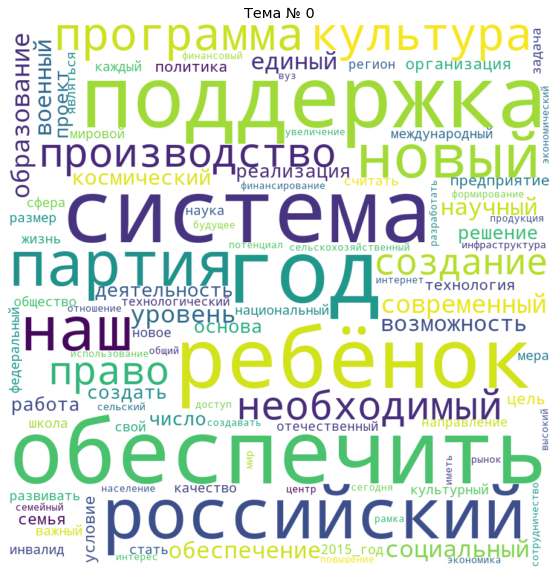

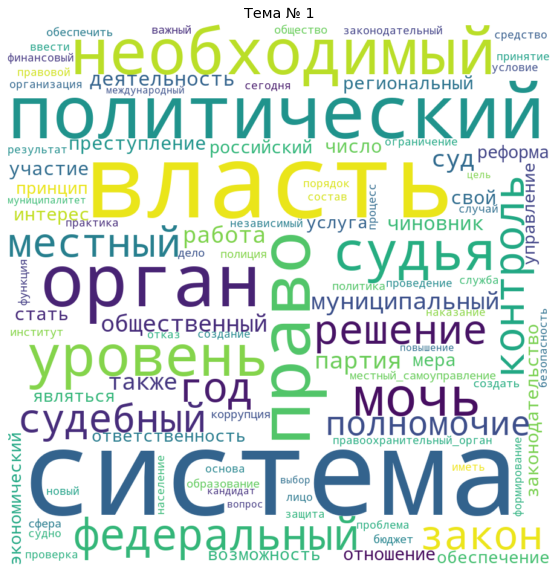

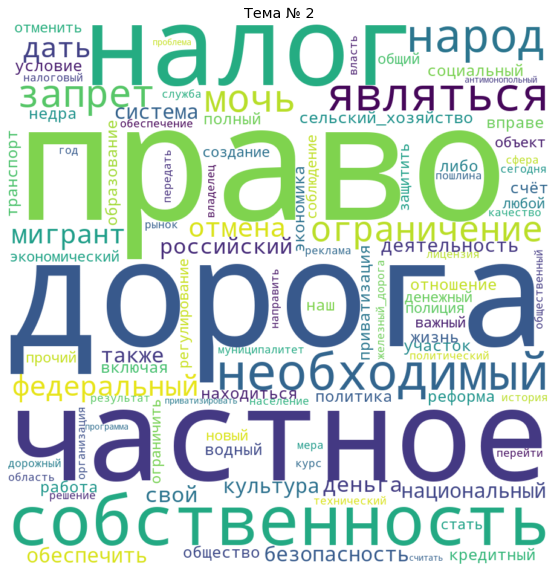

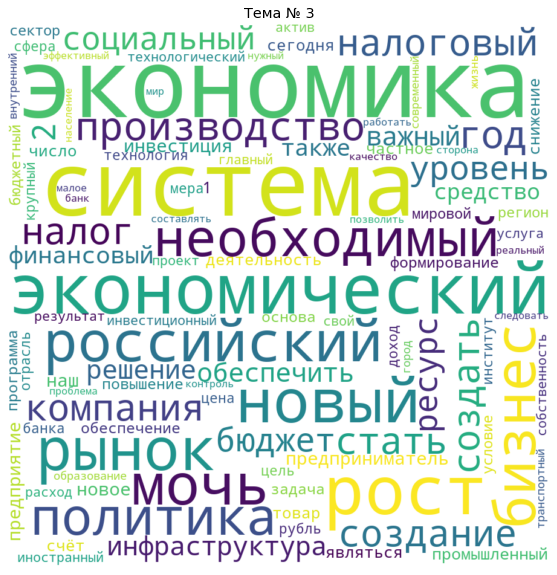

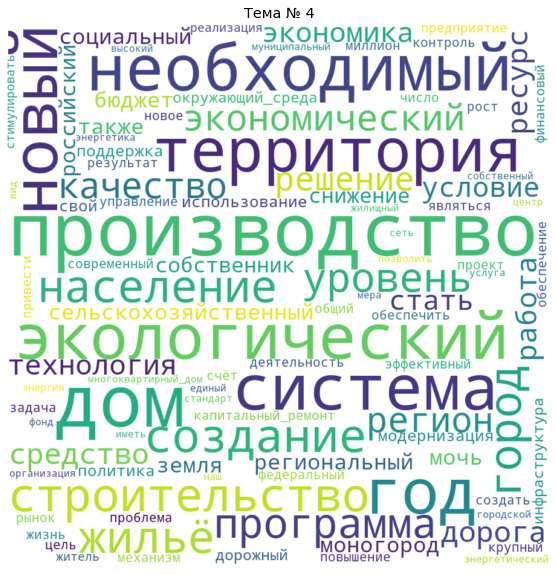

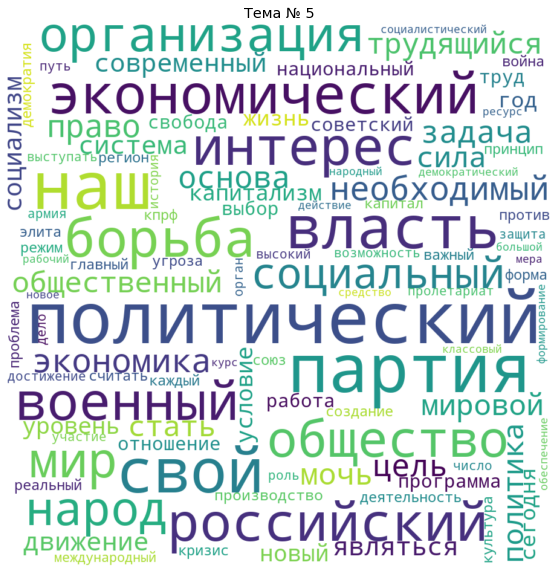

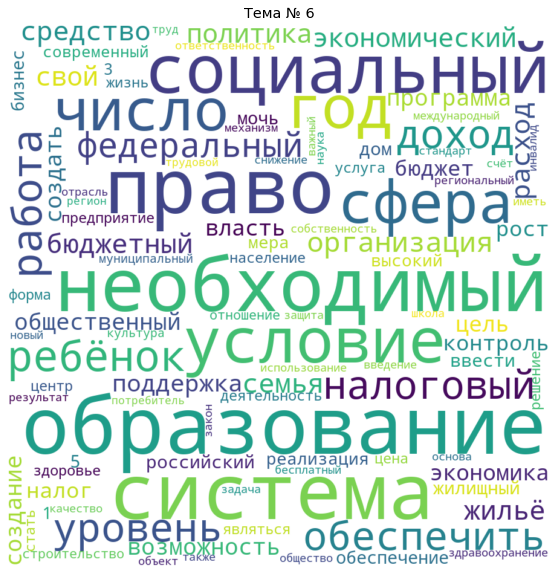

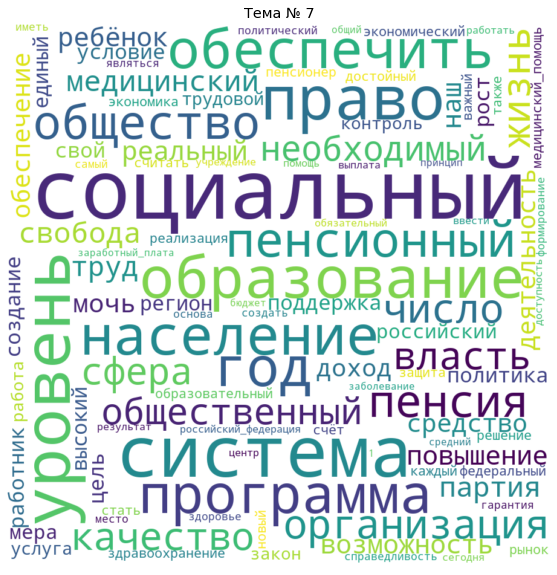

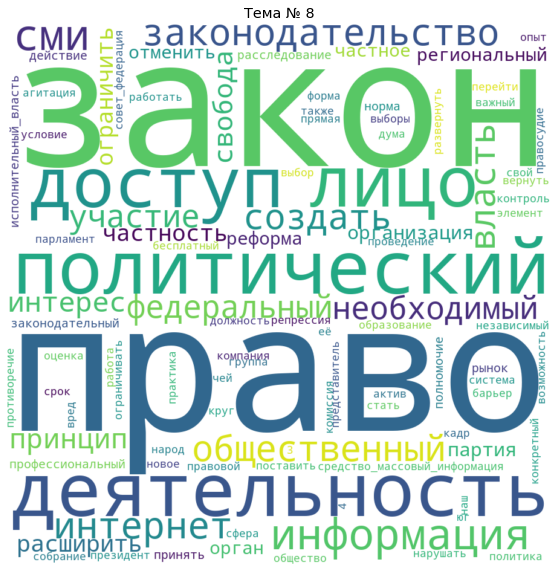

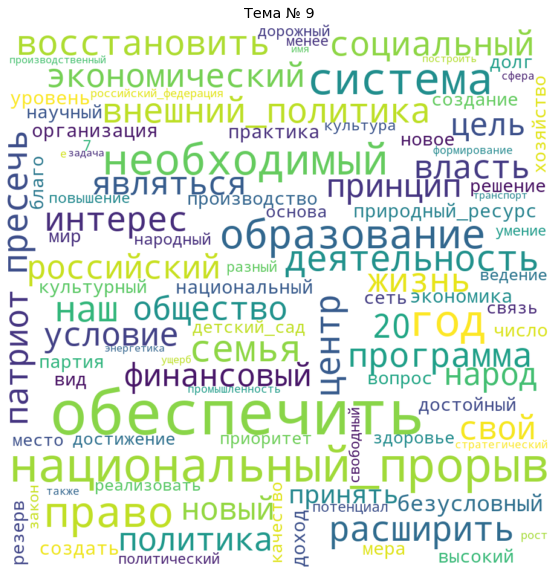

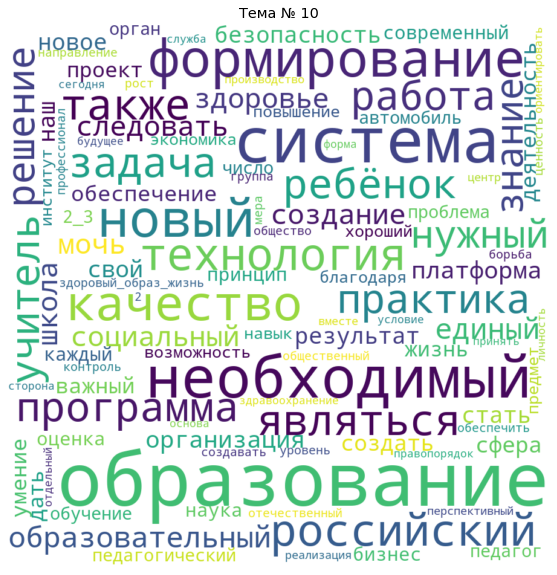

In [27]:
lda_topics = lda_model.show_topics(num_topics=top_num, num_words=100,formatted=False)
for i in range(top_num):
    plotWordCloud(topic_number=i)

In [28]:
themes = {
    0 : "гос. поддержка",
    1 : "политическая власть",
    2 : "частная собственность и дороги",
    3 : "экономика",
    4 : "производство и экология",
    5 : "политическая партия",
    6 : "социальные программы и образование",
    7 : "социальные программы и пенсии",
    8 : 'права и закон',
    9 : 'обещания',
    10: 'система образования'
}

## 4.2 Formation of topic profiles

In [29]:
cur_user_prof = lda_model.get_document_topics(corpus[0])
cur_user_prof

[(0, 0.4913427), (5, 0.5071426)]

In [30]:
def topicProfileGenre(model, party, dataset, corpus, genre=True):

    # Тут будем хранить результат
    theme_results = [ ]

    # Какое в модели количество топиков
    r = model.num_topics
    
    # Выбираем из таблицы те строки, которые соовтетствуют текущему жанру
    if genre:
        num = dataset[dataset.party == party].index.get_values() 
    else:
        num = dataset[dataset.ideology == party].index.get_values() 

    # Вектор для тематического профиля жанра
    theme_profile = np.zeros(r)
    err = 0 # Для записи ошибок

    # Пробежимся по всем любителям текущего жанра
    for i in num:
        try:
            # вытаскиваем тематический профиль текущего юзера
            cur_user_prof = model.get_document_topics(corpus[i])

            # сортируем по номерам тем
            cur_user_prof = sorted(cur_user_prof, key=lambda w: w[0], reverse=True)      

            ind = [cup[0] for cup in cur_user_prof]     # делаем вектор с номерами тем
            prob = np.array([cup[1] for cup in cur_user_prof]) # делаем вектор с весами  
            theme_profile[ind] += prob        # Увеличиваем соответствующие веса
        except:
            err += 1 # Если возникла ошибка, значит профиль битый 

    # Нормируем к единице
    #print('Доля битых профилей для {}:'.format(music_style), err/len(num))
    theme_profile = theme_profile / np.sum(theme_profile)
    theme_profile = list(zip(range(30),theme_profile))
    return theme_profile

In [31]:
if (prepare):    
    party_themes = { }
    for cur_party in tqdm_notebook(df.party.unique()):
        
        # Выделяем темы для текущего жанра
        theme = topicProfileGenre(lda_model, cur_party, df, corpus)
        
        # Записываем их в словарик:
        party_themes[cur_party] = theme
        
    ideolog_themes = { }
    for cur_ideology in tqdm_notebook(df.ideology.unique()):
        
        # Выделяем темы для текущего жанра
        theme = topicProfileGenre(lda_model, cur_ideology, df, corpus, genre=False)
        
        # Записываем их в словарик:
        ideolog_themes[cur_ideology] = theme
        # Сохраняем словарик с тематическими профилями 
        with open('ideolog_themes', 'wb') as f:
            pickle.dump(ideolog_themes, f)
    # Сохраняем словарик с тематическими профилями 
    with open('party_themes', 'wb') as f:
        pickle.dump(party_themes, f)
else:
    # Читаем словарик с тематическими профилями 
    with open('party_themes', 'rb') as f:
        music_style_themes = pickle.load(f)
    
    #with open('ideolog_themes', 'rb') as f:
    #    performer_themes = pickle.load(f)

In [32]:
def profilePlot(theme_profile, music_style, themes=themes):
    """
    Строит тематическией профиль для каждого жанра
    theme_profile:
        тематический профиль, dict
    music_style: 
        стиль музыки
    themes dict:
        названия тем
    """
    
    theme_profile = theme_profile[music_style]
    sorted_prof = sorted(theme_profile, key=lambda w: w[1], reverse=True)   
    
    # рисуем картинку
    sns.set(font_scale=2)
    plt.subplots(figsize=(30, 40))
    
    prof = np.array([pr[1] for pr in sorted_prof]).reshape(1,-1)
    them = [themes[pr[0]] for pr in sorted_prof]
    
    ax = plt.axes()    
    sns.heatmap(prof, ax = ax, square=True, annot=True, fmt=".2f", linewidths=0.1, 
                 cmap="YlGnBu", cbar=False, yticklabels='', xticklabels=them )
    ax.set_title('Тематический профиль для {}: \n'.format(music_style))
    plt.show()

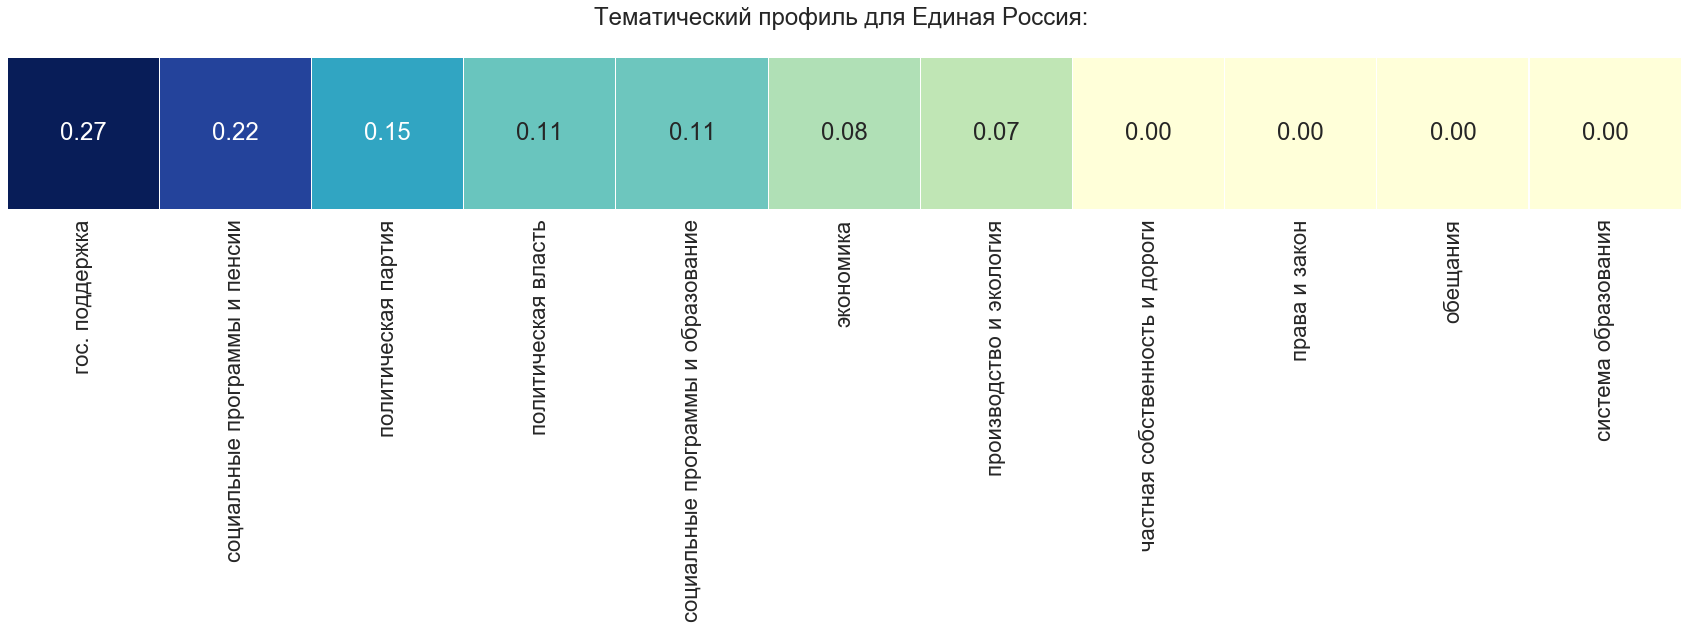

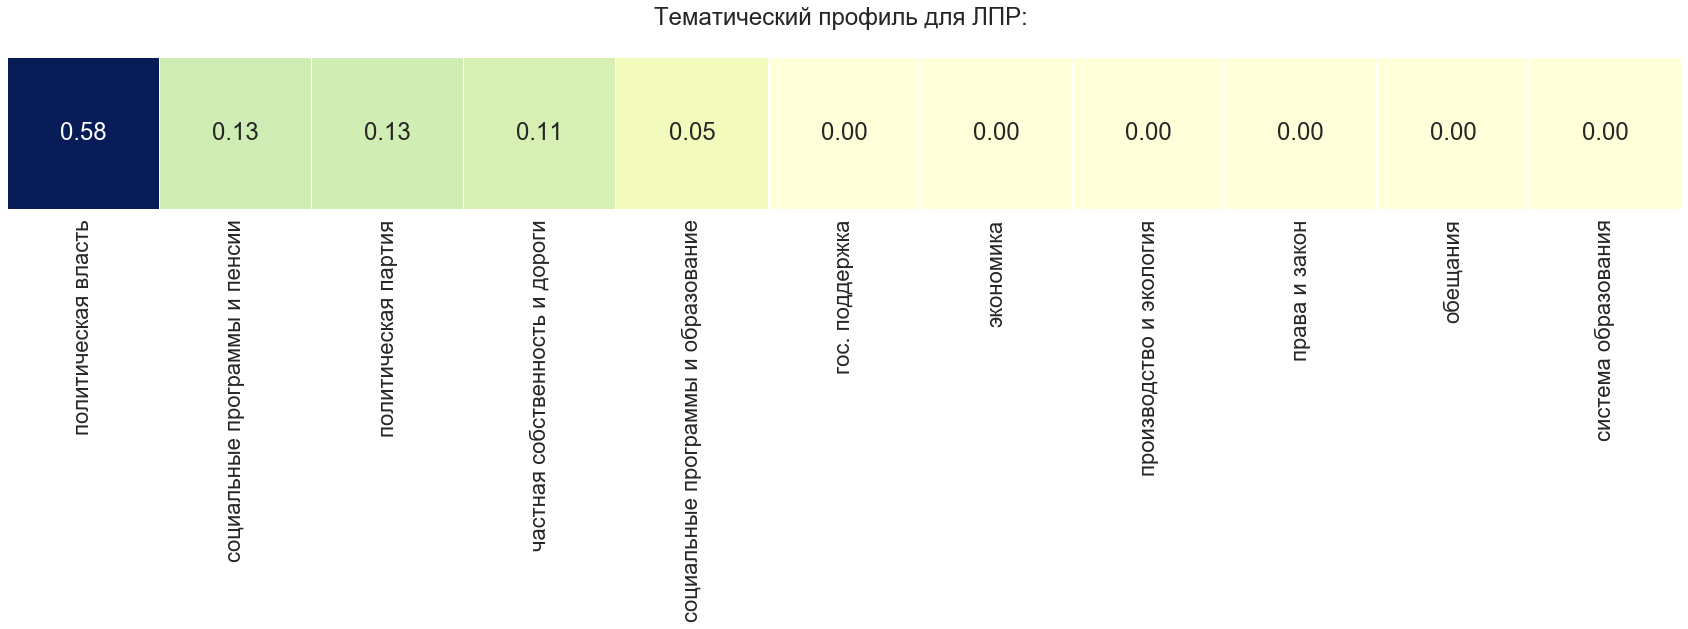

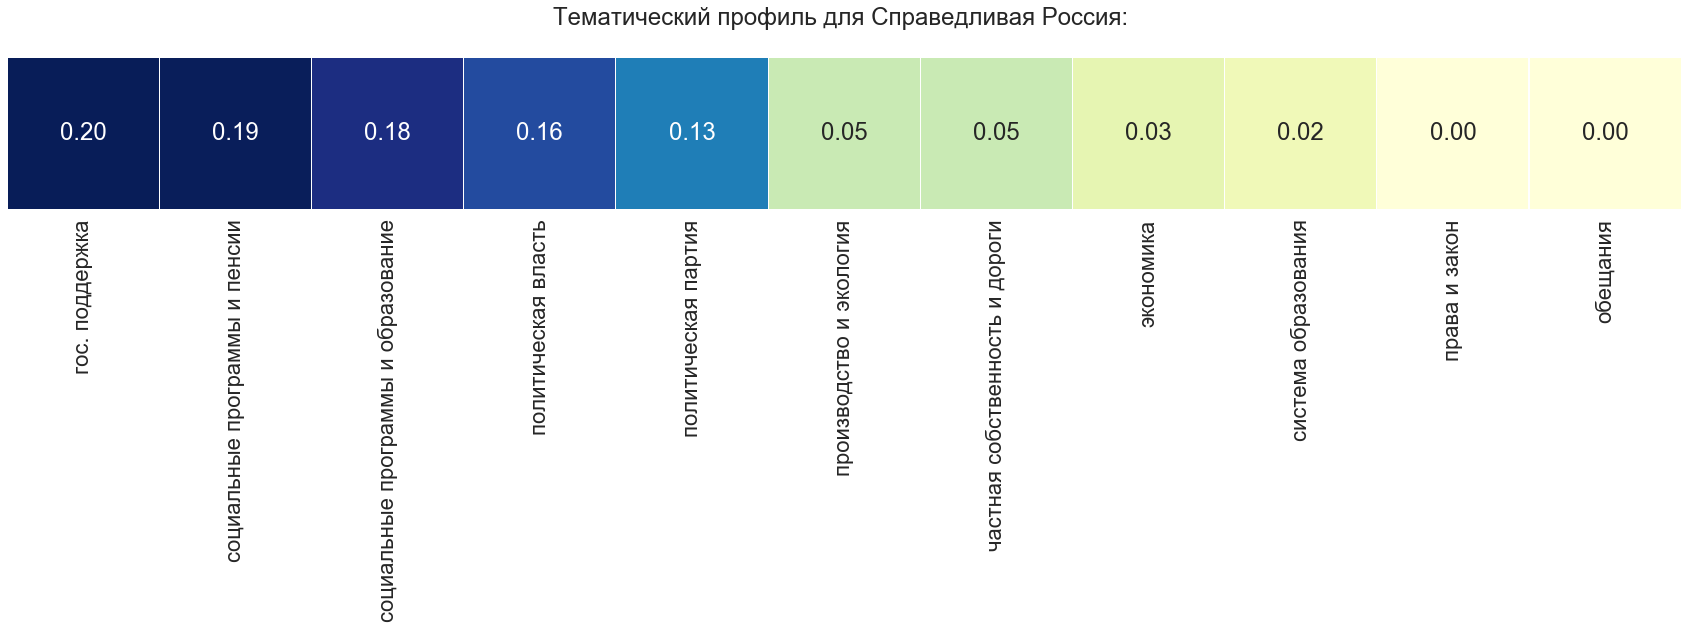

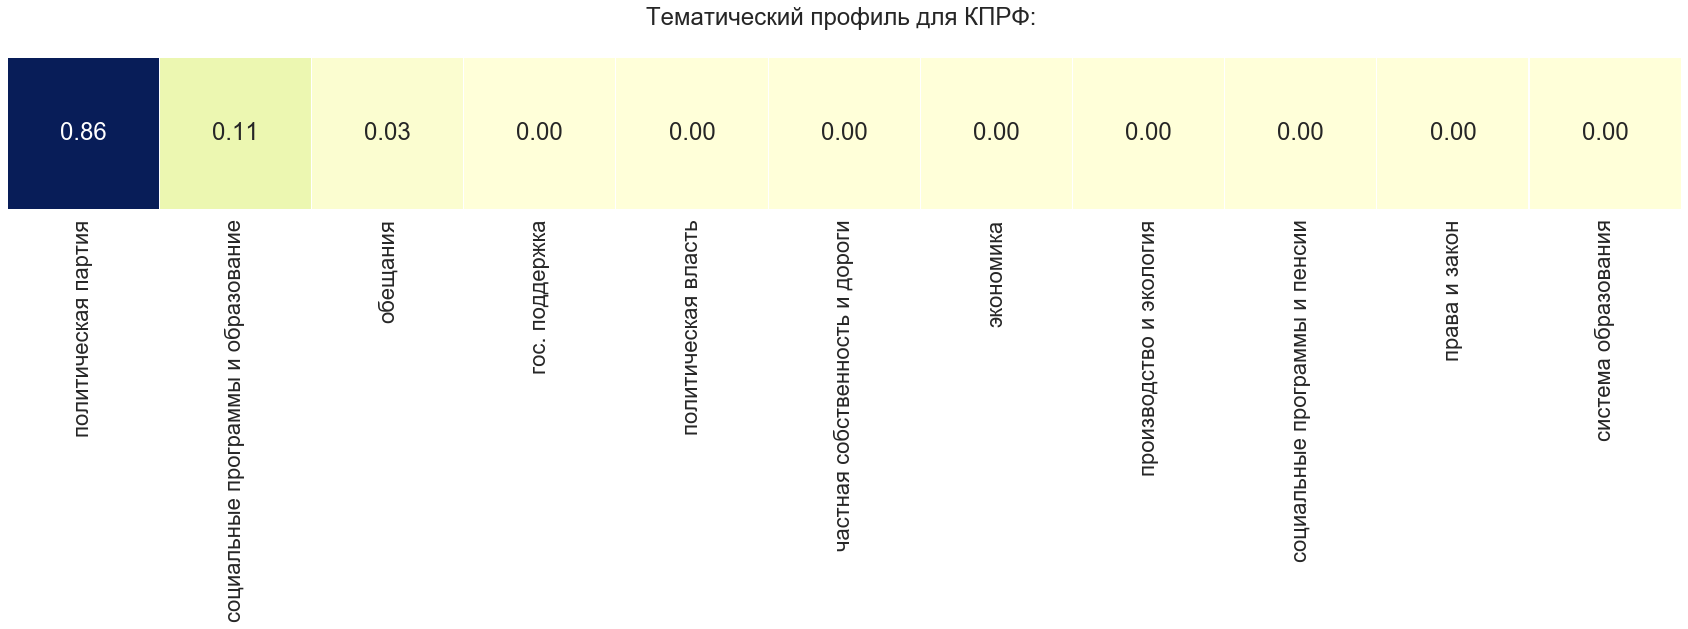

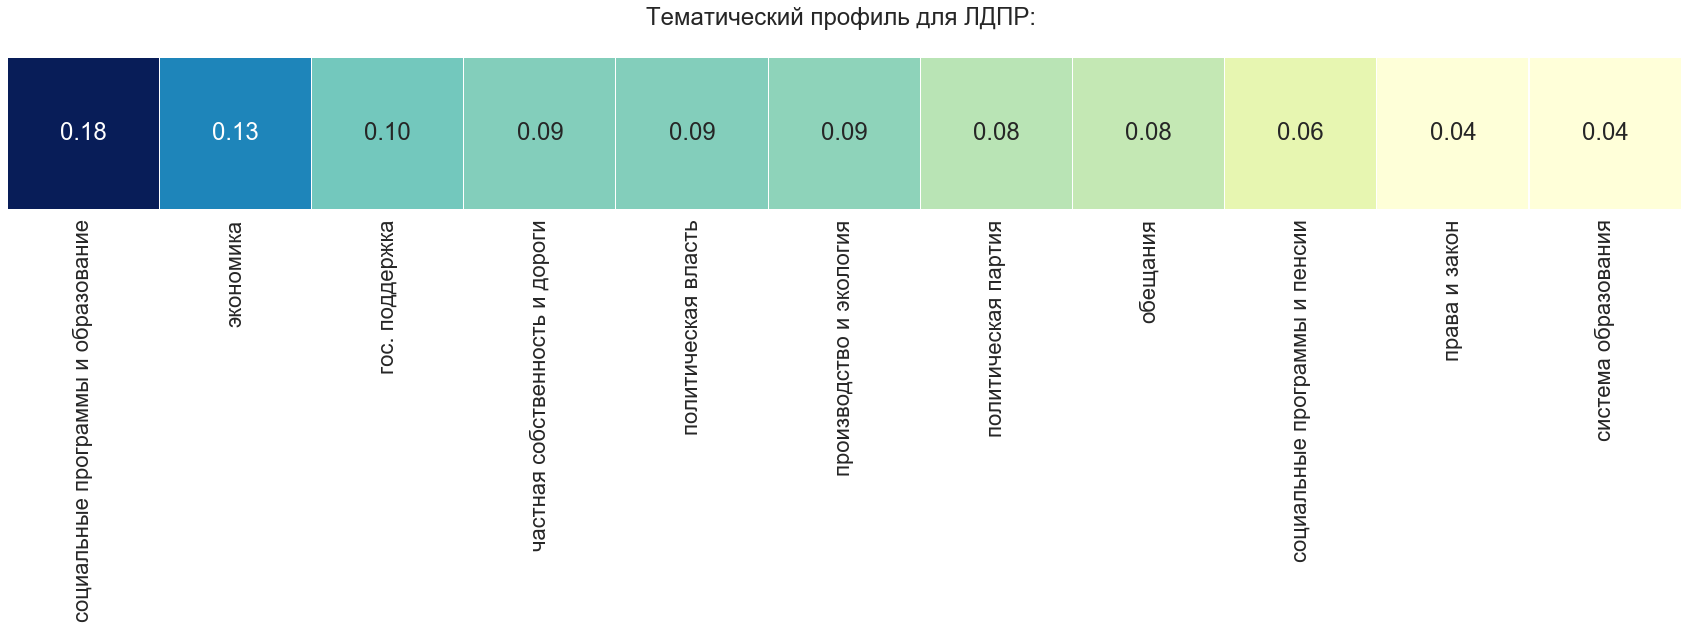

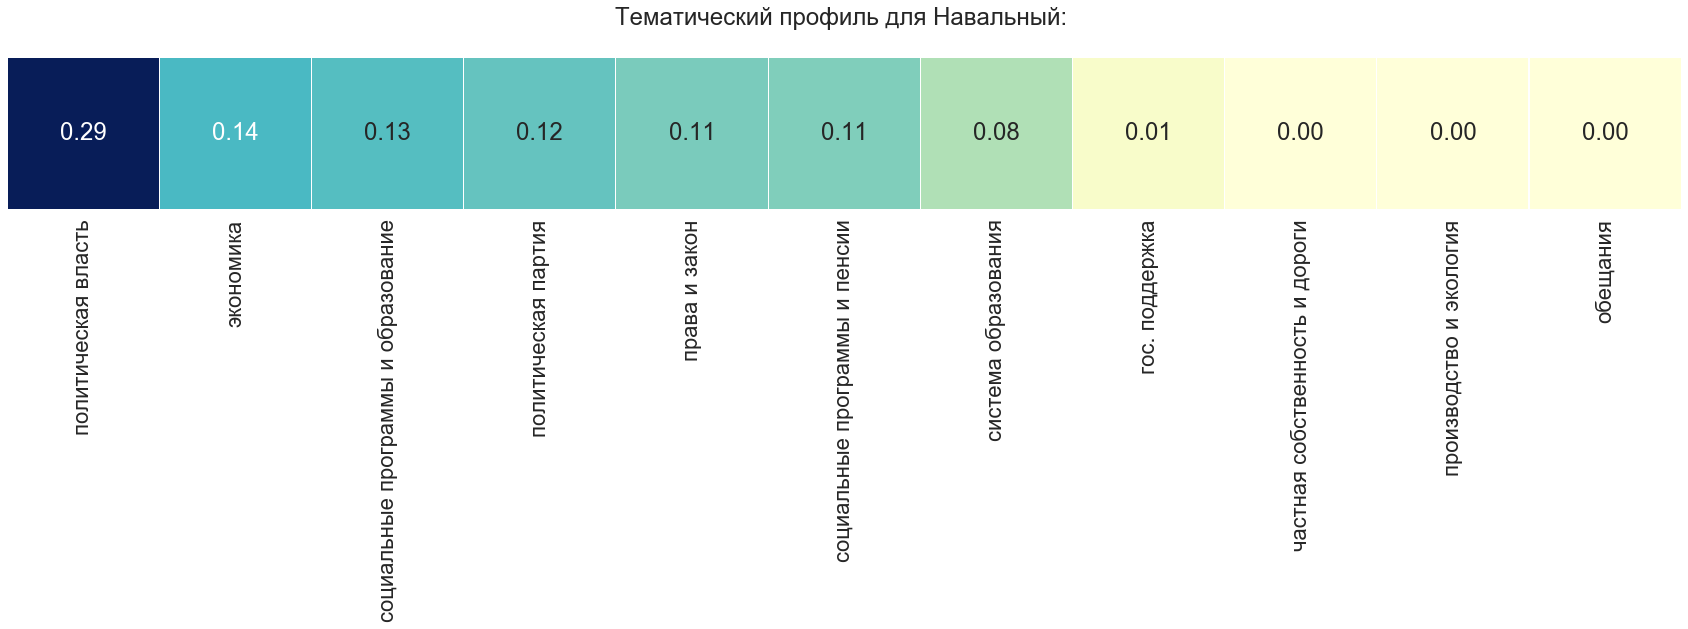

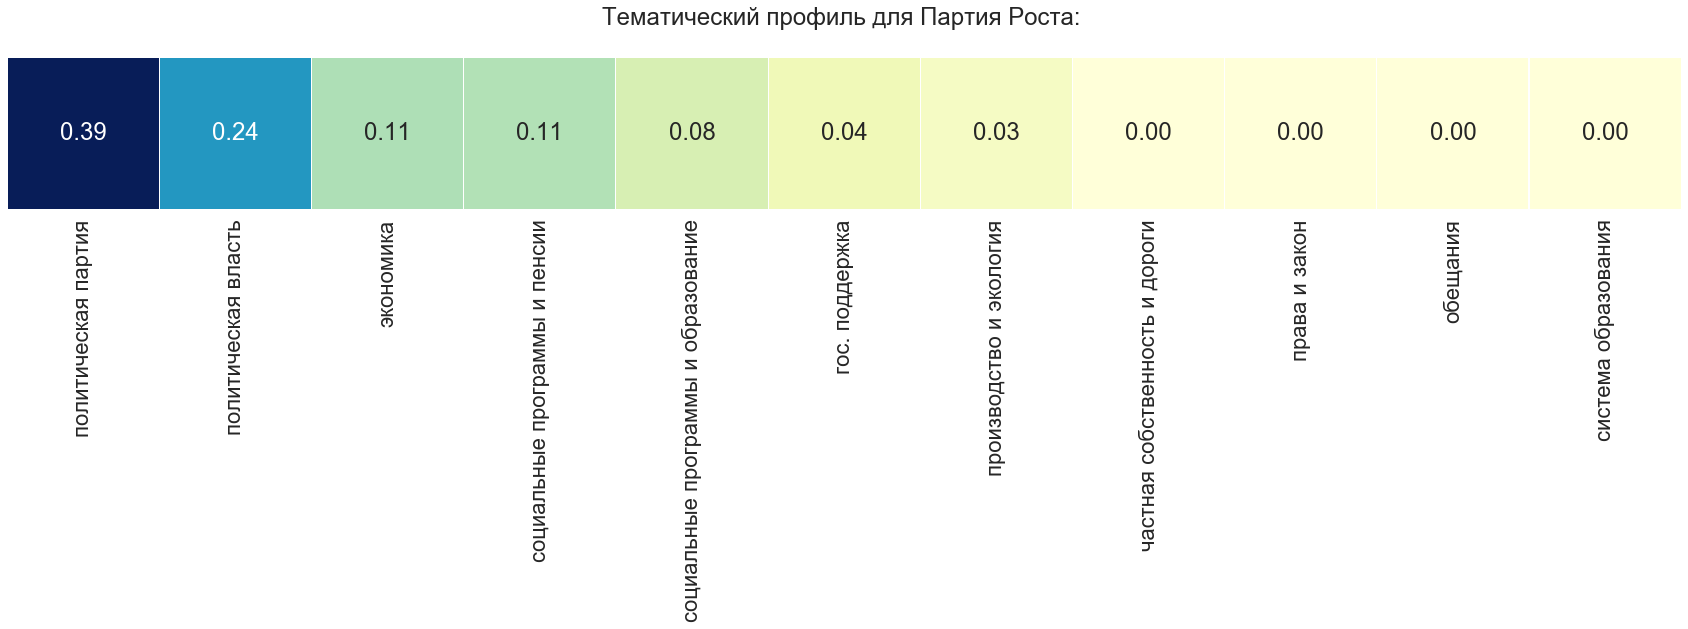

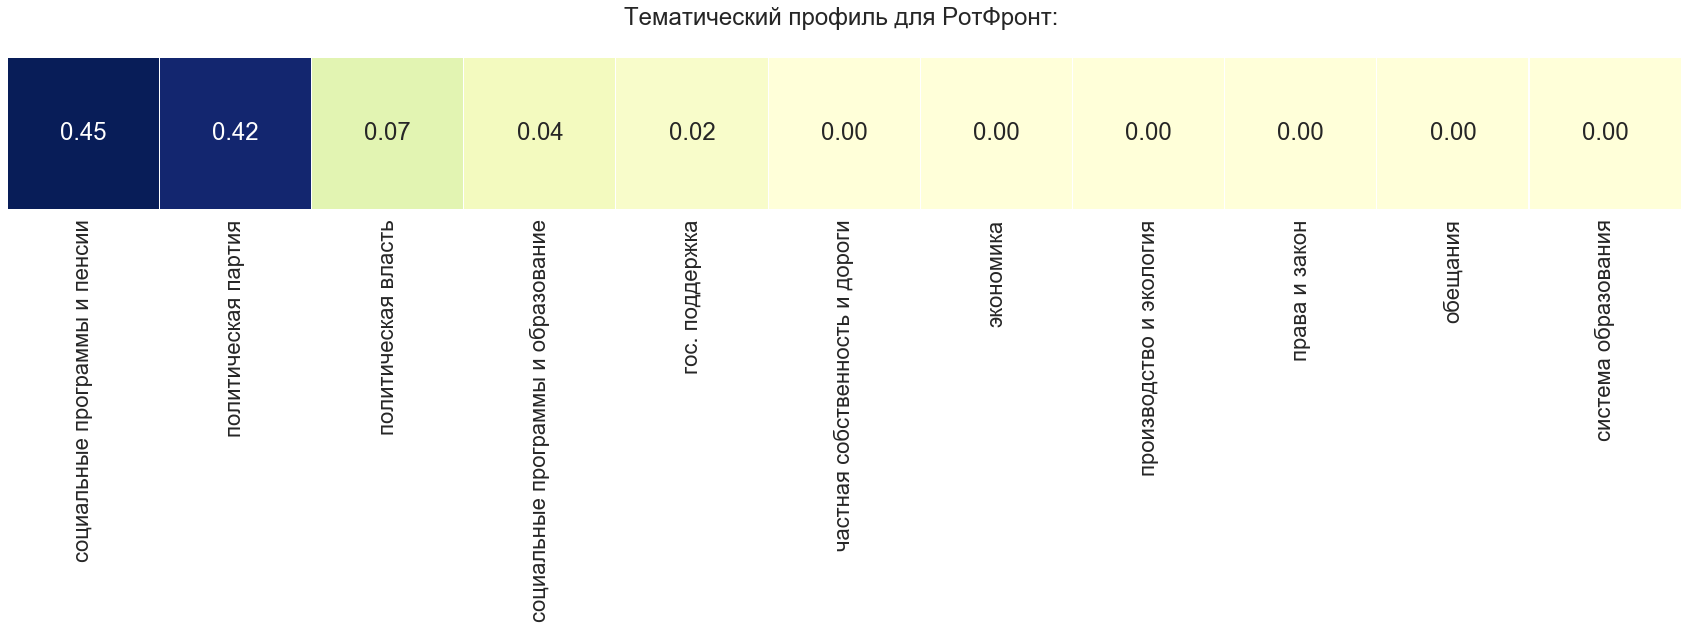

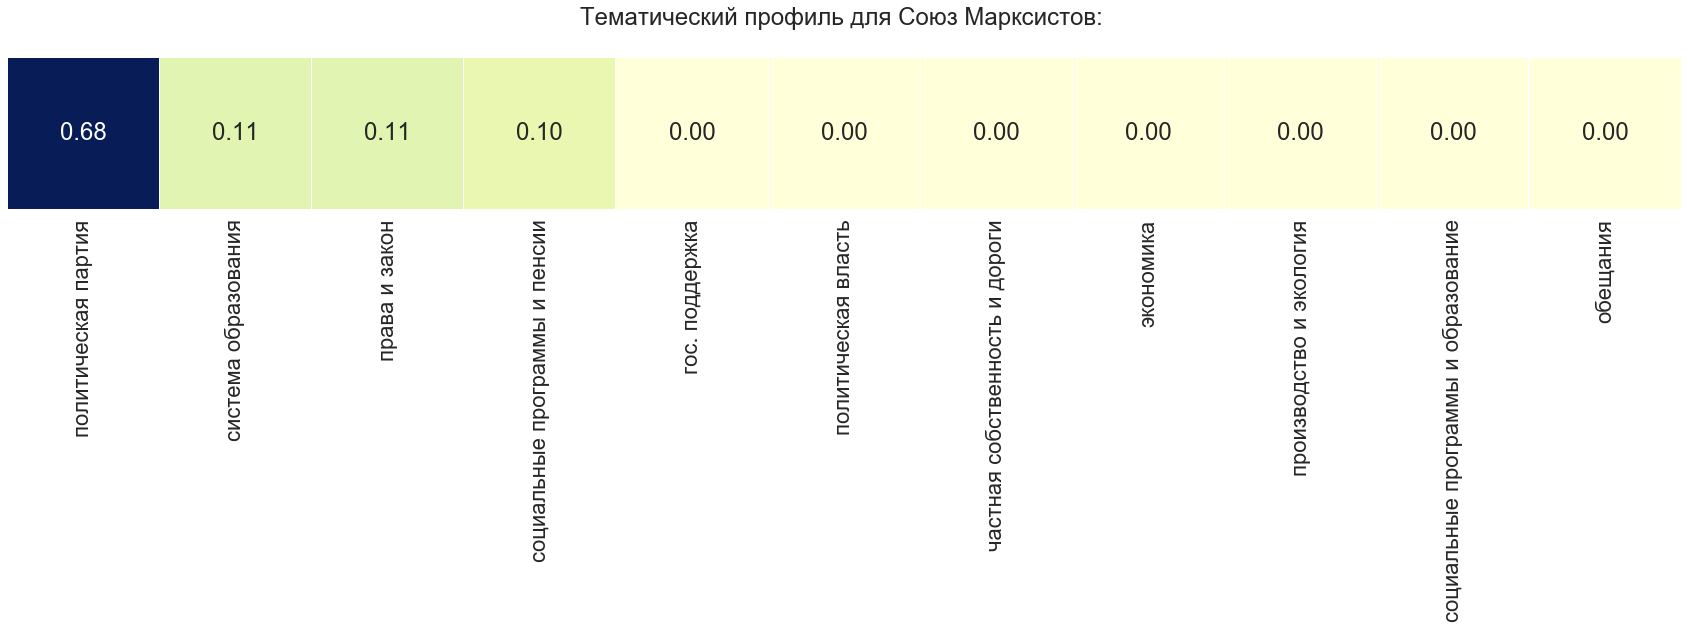

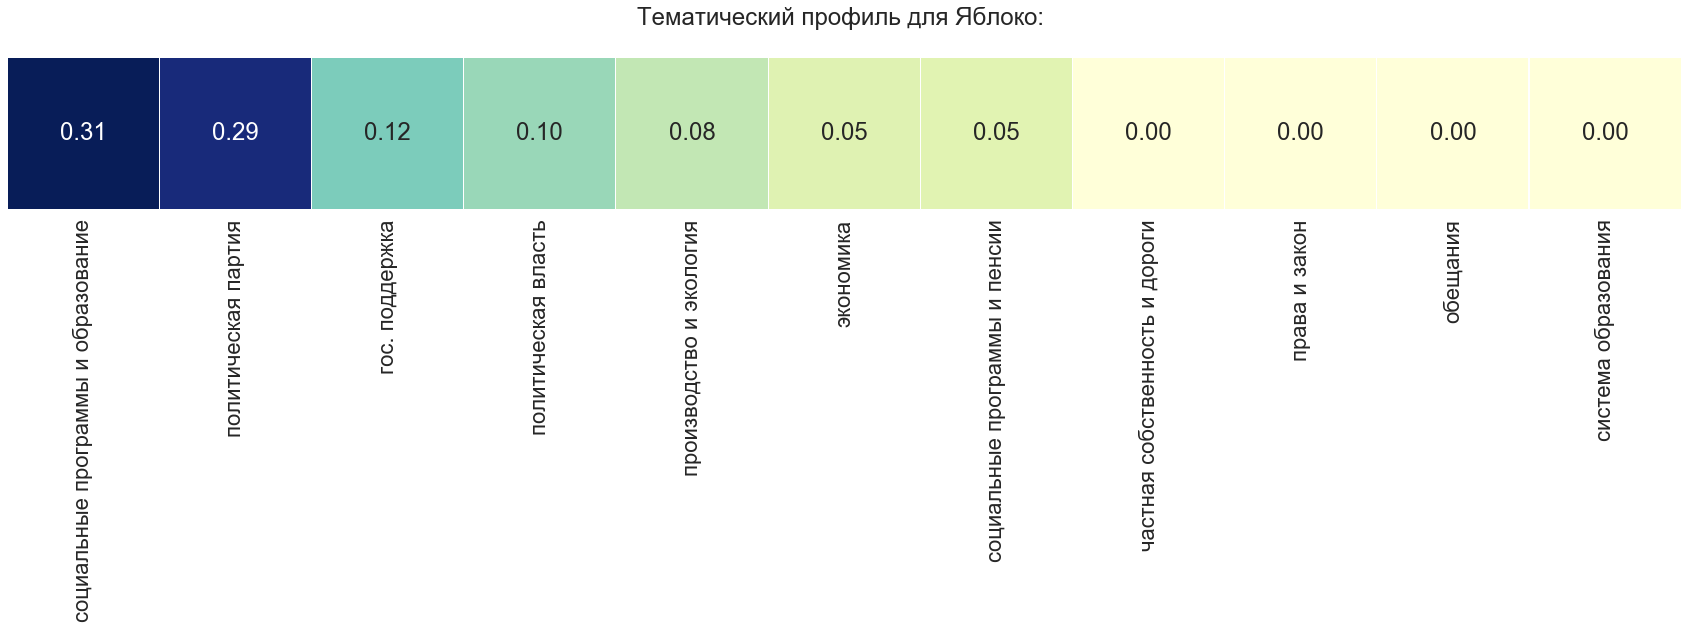

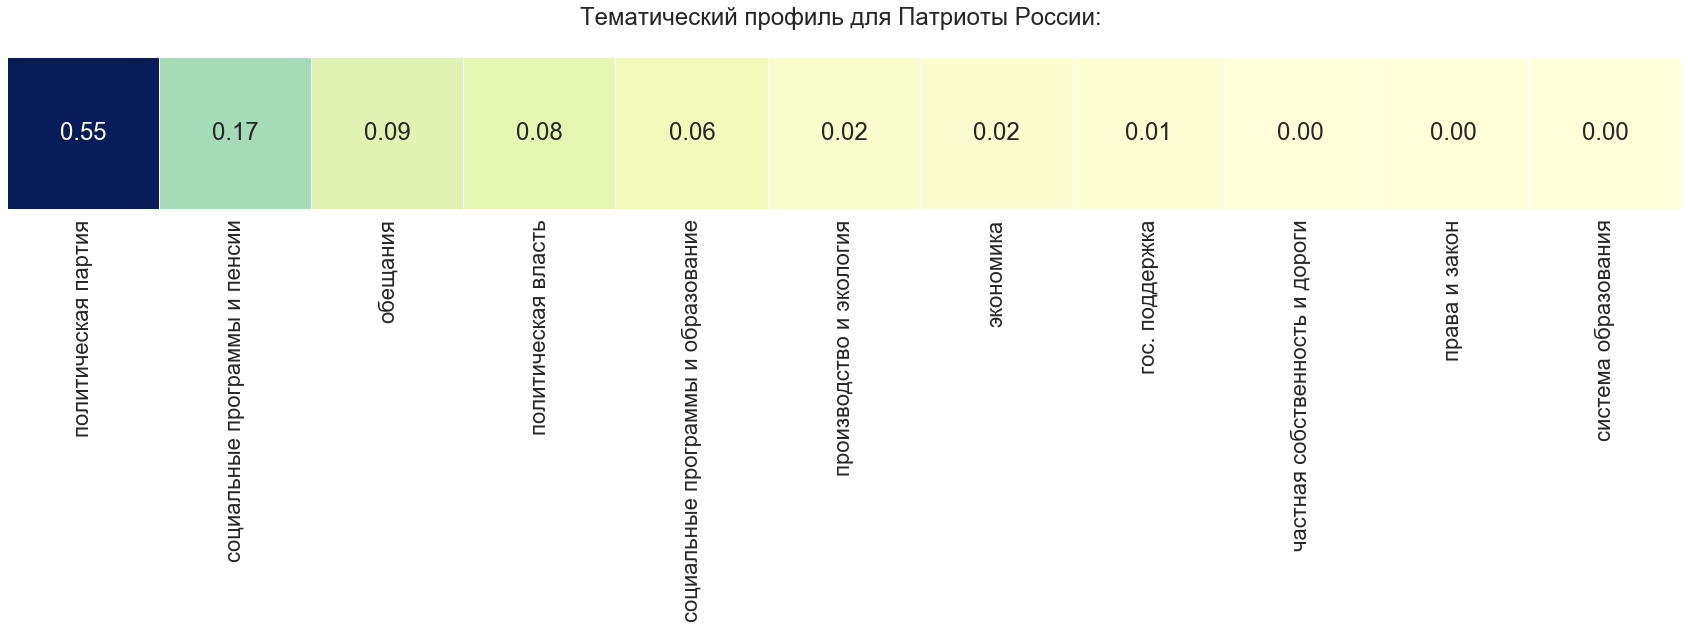

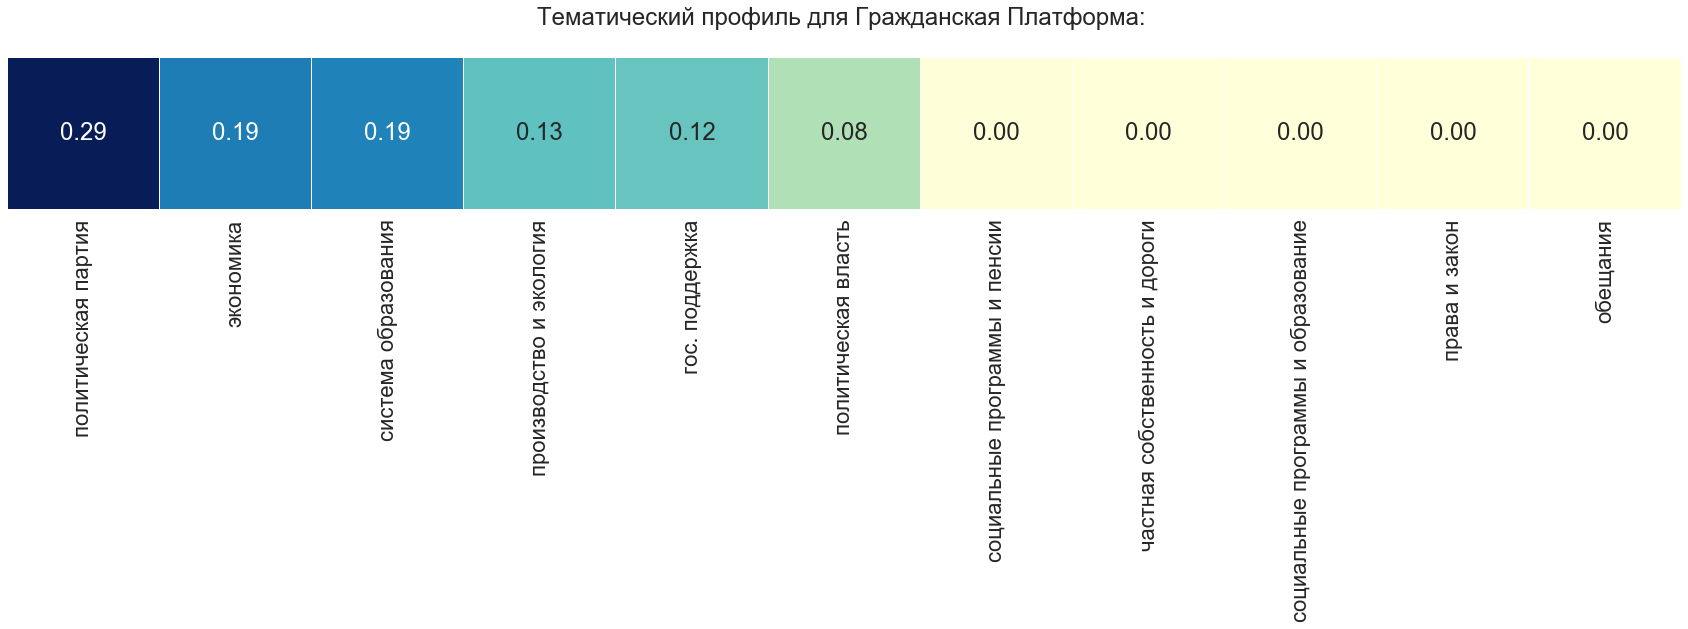

In [33]:
for cur_party in df.party.unique():
    profilePlot(party_themes, cur_party)

In [34]:
#for cur_ideolog in df.ideology.unique():
#    profilePlot(ideolog_themes, cur_ideolog)

## 4.3 Visualization of topic profiles

In [35]:
import umap
import chart_studio.plotly as py
import plotly.graph_objects as go

In [36]:
party_themes_clusters = {}
for k, v in party_themes.items():
    party_themes_clusters[k] = [prob[1] for prob in v]
    
party_themes_clusters = pd.DataFrame(party_themes_clusters).T

In [84]:
umap_model = umap.UMAP(
                        n_neighbors = 20         ,#15,
                        n_components= 2          ,#2,
                        metric      = 'cosine'   ,#'euclidean',
                        min_dist    = 0.01       ,#0.1,
                        random_state= 10          #10,
                        )


umap_features = umap_model.fit_transform(party_themes_clusters)

In [85]:
# Create a trace
trace = go.Scatter(
    x = umap_features[:, 0],
    y = umap_features[:, 1],
    mode = 'markers+text',
    text = party_themes_clusters.index,
    textposition='top center'
)

data = [trace]

layout = go.Layout(
    autosize=False,
    width=800,
    height=800
)

fig = go.Figure(data=data, layout=layout)
fig.show(filename='size-margins')